# Read source files :

In [1]:
import pandas as pd
product_launch = pd.read_csv("Product Launch Dataset.csv", encoding='cp1252')
positioning_category = pd.read_csv("Positioning Category Mapping Dataset.csv", encoding='cp1252')
flavor_classification = pd.read_csv("Flavor Classification Dataset.csv", encoding='cp1252')

# Data Exploration: Data Handling and Formatting: 

In [2]:
flavor_df = product_launch.flavor.str.split('\|\|', expand=True)
flavor_df.dropna(axis='columns', how='all', inplace=True)
flavor_df.reset_index()
flavor_df.dropna(axis=1, how='all', inplace=True)
flavor_df.insert(0, 'market_subcategory', product_launch['market_subcategory'])
flavor_df = pd.DataFrame(flavor_df.stack())
flavor_df.reset_index(inplace=True)
flavor_df = flavor_df[flavor_df['level_1'] != 'market_subcategory']
flavor_df.set_index('level_0', inplace=True)
product_launch = pd.merge(product_launch, flavor_df, left_index=True, right_index=True, how='left')
product_launch.rename(columns={0: 'flavor_derived'}, inplace=True)

### Unique Flavours

In [3]:
flavor_count = len(product_launch['flavor_derived'].unique())
print(f"The Count of Unique Flavors : {flavor_count}")

The Count of Unique Flavors : 17543


### Histogram of market subcategory and year

array([[<AxesSubplot:title={'center':'2005'}>,
        <AxesSubplot:title={'center':'2006'}>,
        <AxesSubplot:title={'center':'2007'}>],
       [<AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2009'}>,
        <AxesSubplot:title={'center':'2010'}>],
       [<AxesSubplot:title={'center':'2011'}>,
        <AxesSubplot:title={'center':'2012'}>,
        <AxesSubplot:title={'center':'2013'}>],
       [<AxesSubplot:title={'center':'2014'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

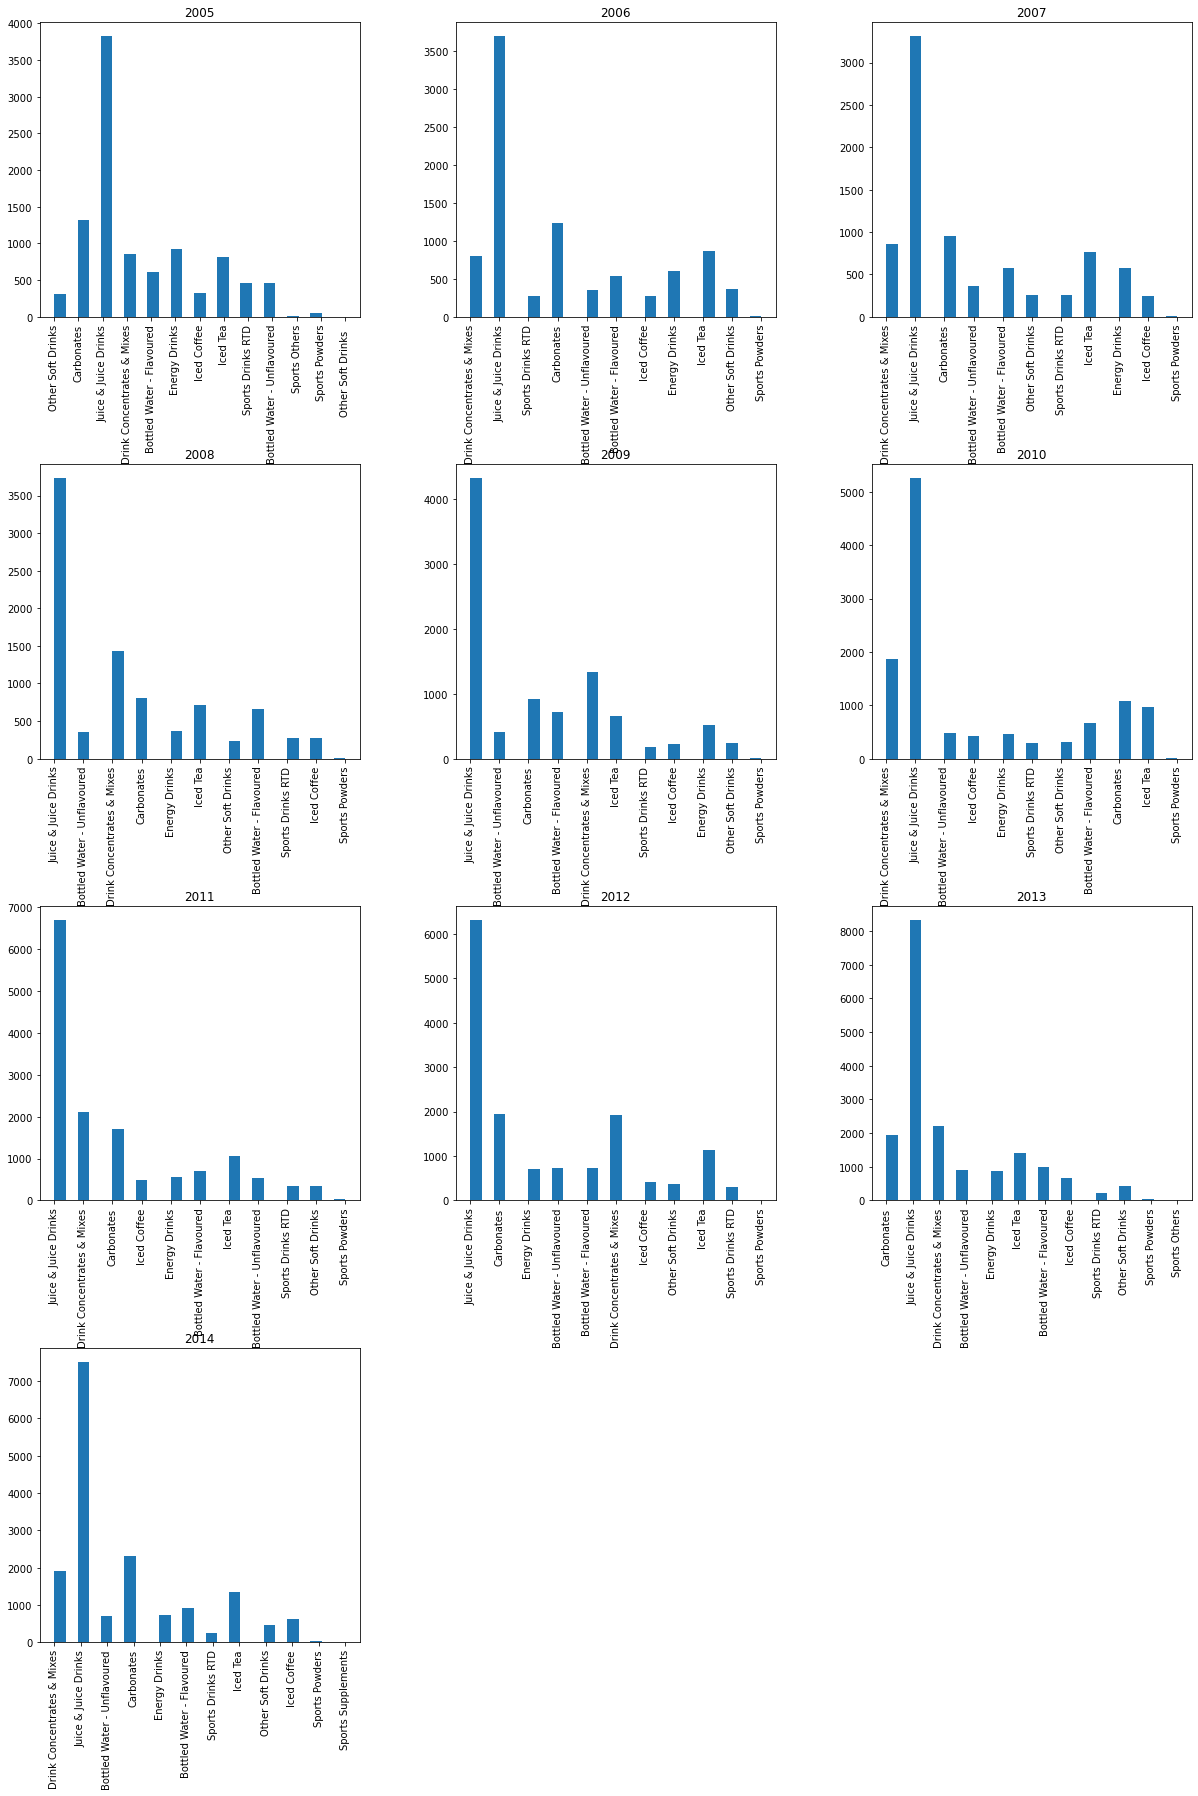

In [4]:
product_launch['year'] = product_launch['eventdate'].astype('datetime64').dt.year
product_launch.hist(column='market_subcategory', by='year', bins=25, grid=False, figsize=(20,30))

### market subcategory having highest unique flavors

In [5]:
highest_unique_flavors = product_launch.groupby(['market_subcategory']).apply(lambda x: len(x['flavor_derived'].unique()))
highest_unique_flavors = highest_unique_flavors.reset_index()
highest_unique_flavors.rename(columns={0: 'unique_flavors'}, inplace=True)
print(f"The Category having highest unique flavors :{highest_unique_flavors.sort_values(by='unique_flavors').tail(1).values}")

The Category having highest unique flavors :[['Juice & Juice Drinks' 8849]]


## 2. Data Exploration: Merging and Manipulating Datasets

### No of Fruit Product Launches by Quarter

In [6]:
fruits = flavor_classification[flavor_classification['Flavor_Group']=='Fruit'].flavor.unique()
flavor_group = product_launch.flavor_derived.str.split(';', expand=True)
flavor_group.rename(columns = {0: 'flavor_1', 1: 'flavor_2', 2: 'flavor_3'}, inplace=True)
products = pd.concat([product_launch, flavor_group], axis=1)
id1 = products[products['flavor_1'].isin(fruits)]['id']
id2 = products[products['flavor_2'].isin(fruits)]['id']
id3 = products[products['flavor_3'].isin(fruits)]['id']
filter_ids = pd.concat([id1, id2, id3], axis=0).values
fruits_df = products[products['id'].isin(filter_ids)]
fruits_df.loc[:, 'Quarter'] = fruits_df['eventdate'].astype('datetime64').dt.quarter.values
fruit_products = fruits_df.groupby(['year', 'Quarter']).apply(lambda x: x['eventdate'].count())
fruit_products

C:\Users\patil\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\patil\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


year  Quarter
2005  1           3045
      2              3
      3              2
      4              1
2006  1           2945
2007  1           2446
2008  1           3173
2009  1           3051
2010  1           3814
      2              1
      3              6
2011  1           5012
2012  1           8724
2013  1          11523
      4              2
2014  1           8837
dtype: int64

# 3. Data Formatting, Merging and Manipulating Datasets

### Distribution for “Convenience” & “Ethical Positioning”

In [7]:
filter_category = ['Convenience', 'Convenience – Packaging', 'Convenience – Preparation', 'Ethical']
position_cat = positioning_category[positioning_category['Positioning Group'].isin(filter_category)]
position_subcat = position_cat['Positioning Subcategory'].values
position_product_launch = product_launch.positioning.str.split(",", expand=True)
position_product_launch['id'] = product_launch['id']
filter_ids = []
for col in position_product_launch.columns:
    ids = position_product_launch[position_product_launch[col].isin(position_subcat)]['id']
    filter_ids.append(ids)
filter_positions = pd.concat(filter_ids, axis=0)
product_positions = product_launch[product_launch['id'].isin(filter_positions.values)]
convenience_products = position_cat[position_cat['Positioning Group']== 'Convenience']['Positioning Subcategory'].values
convenience_prods = product_positions[product_positions.positioning.isin(convenience_products)]['market_subcategory'].value_counts()
convenience_packaging = position_cat[position_cat['Positioning Group']== 'Convenience – Packaging']['Positioning Subcategory'].values
convenience_packs = product_positions[product_positions.positioning.isin(convenience_packaging)]['market_subcategory'].value_counts()
convenience_preparation = position_cat[position_cat['Positioning Group']== 'Convenience – Preparation']['Positioning Subcategory'].values
convenience_prep = product_positions[product_positions.positioning.isin(convenience_preparation)]['market_subcategory'].value_counts()
ethical_products = position_cat[position_cat['Positioning Group']== 'Ethical']['Positioning Subcategory'].values
ethical_prods = product_positions[product_positions.positioning.isin(ethical_products)]['market_subcategory'].value_counts()

### From above analysis, it is inferred that the company has launched most products in carbonates category under Convenience positioning.
### The company has launched around 42 products under Juice and Juice Drinks Category under Ethical positioning

# 4. Data Aggregation

#### Excel Tool in the sheet attached

In [ ]:
pivot_df = product_launch.copy()
pivot_df['Year'] = product_launch['eventdate'].astype('datetime64').dt.year
pivot_df['Month'] = product_launch['eventdate'].astype('datetime64').dt.month
pivot_df['Quarter'] = product_launch['eventdate'].astype('datetime64').dt.quarter
pivot_df.to_excel('Excel__Tool.xlsx')

# 5. Data Exploration: Filtering and Subsetting 

#### Data from the Canadian market for the year 2013 about Energy drinks with ethical packaging.

In [ ]:
import numpy as np
df = product_launch.copy()
subset = np.where((df['country']=='Canada') & (df['year']==2013) & (df['market_subcategory']=='Energy Drinks') & (df['positioning'].str.contains('Ethical - Packaging')))
product_launch.iloc[subset]

#### TOP 5 unique flavors across countries in 2013

In [11]:
unique_flavors = df[df['year']==2013]
top5 = unique_flavors.groupby(['flavor_derived']).count()
top5.sort_values(['eventdate'], ascending=False, inplace=True)
top5.reset_index(inplace=True)
top5.drop(columns=['market_subcategory', 'id', 'eventdate', 'country', 'positioning', 'region', 'flavor', 'level_1'], inplace=True)
top5.rename(columns={'flavor_derived': 'Flavor', 'year': 'Total Product Launches'}, inplace=True)
top5.head()

,Flavor,Total Product Launches
0,Unflavored,1492
1,"Orange, Not specified",1112
2,"Apple, Red",666
3,Lemon,474
4,Cola,382


 # 6. Hypothesis Testing: TOP 5 Positioning Groups

In [12]:
hypo_df = product_launch.copy()
hypo_df = hypo_df[hypo_df['year']==2013]
top5_positions = hypo_df.groupby(['positioning']).count()
top5_positions.sort_values(['eventdate'], ascending=False, inplace=True)
top5_positions.reset_index(inplace=True)
top5_positions.drop(columns=['market_subcategory', 'id', 'eventdate', 'country', 'flavor_derived', 'region', 'flavor', 'level_1'], inplace=True)
top5_positions.rename(columns={'positioning': 'Positioning', 'year': 'Total Product Launches'}, inplace=True)
top5_positions.head()

,Positioning,Total Product Launches
0,Convenience - Consumption,1289
1,"Convenience - Consumption, Ethical - Packaging",403
2,"Juice Drinks (up to 25% juice), Convenience - ...",257
3,"Packaging, Ethical - Packaging",250
4,"Dry, Convenience - Easy-to-Prepare",247


In [13]:
from scipy.stats import ttest_ind
def compare_2_groups(array1, array2, alpha, sample_size):
    stats, p = ttest_ind(array1, array2)
    print(f'Statistics={stats}, p={p}')
    if p>alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
        
sample_size = 5
array1 = top5_positions['Total Product Launches'].head().values
array2 = np.random.choice(top5_positions['Total Product Launches'][5:], sample_size)
compare_2_groups(array1, array2, 0.05, sample_size)
 

Statistics=2.4156112801338434, p=0.04213764260753358
Different distributions (reject H0)
